## Importamos libreria y datos a trabajar

In [68]:
# Importacion de librerias
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# -----------------------------------------------------------------------
# Configuración

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.float_format', '{:,.2f}'.format) # Evitar notación científica y establecer formato de dos decimales






## Carga de datos

In [69]:
df = pd.read_pickle("../datos/output_data/df_limpio.pkl")

## Objetivo de analisis.

#### Analizar los resultados fiscales de los años seleccionados, evaluando la relación entre ingresos efectivos y previstos en el presupuesto en los distintos ministerios, con énfasis en sus fuentes de financiamiento y el monto asignado a cada uno.

#### La misión es identificar patrones, detectar áreas problemáticas donde la recaudación ha sido consistentemente menor a lo previsto


## 01.01. Agrupacion de de ministerios

In [71]:
df_ministerios = df.groupby(["NOM_organo_superior"])[['valor_previsto_actualizado','valor_recaudado','valor_lanzado']].sum() ## Agrupamos por ministerios
df_ministerios["dif_prev_recaudado"] = (df_ministerios["valor_recaudado"]-df_ministerios["valor_previsto_actualizado"]) ## Vemos la diferencia entre el valor de recaudacion actualizado y el real.
df_ministerios["porcentaje"] = (df_ministerios["valor_recaudado"]/df_ministerios["valor_previsto_actualizado"]*100) 
df_ministerios = df_ministerios.sort_values(["porcentaje"], ascending=[False]) ## ordenamos por porcentaje

## 01.02. Analisis estadistico de variables numericas con dataframe de ministerios.

In [72]:
df_ministerios.describe().T

,count,mean,std,min,25%,50%,75%,max
valor_previsto_actualizado,25.00,"1,133,502,952,474.75","5,283,625,117,623.79","37,327,399.00","843,366,940.00","36,304,805,355.02","87,492,532,893.00","26,486,420,136,019.00"
valor_recaudado,25.00,"1,025,495,297,417.84","4,934,594,426,431.50","7,555,037.45","334,962,977.49","13,535,637,878.06","40,047,759,133.20","24,709,753,338,137.24"
valor_lanzado,25.00,"215,227,466,590.78","1,073,366,026,466.02",0.00,0.00,0.00,"11,831.64","5,367,369,003,775.87"
dif_prev_recaudado,25.00,"-108,007,655,056.91","357,550,454,653.72","-1,776,666,797,881.76","-38,815,494,119.82","-4,979,298,326.38","-292,512,448.94","16,234,017,546.34"
porcentaje,25.00,61.40,37.34,1.02,36.35,55.89,92.23,141.06


### 1. Valor previsto actualizado
La media de los valores previstos es de 1.13 billones, con una desviación estándar extremadamente alta (5.28 billones). Esto sugiere una gran disparidad entre los ministerios en cuanto a sus presupuestos previstos.
Hay ministerios con valores previstos tan bajos como 37 millones, mientras que el mayor previsto asciende a más de 26 billones.
¿Que podriamos buscar? Analizar qué ministerios tienen presupuestos significativamente más altos y por qué.

### 2. Valor recaudado
El valor recaudado promedio es de 1.02 billones, también con una gran variación (4.93 billones).
El rango va desde ingresos mínimos de 7 millones hasta máximos de 24 billones, lo que indica que algunos ministerios lograron recaudar montos significativos, mientras que otros están muy por debajo de los valores previstos.

### 3. Valor lanzado
La mayoría de los ministerios tienen un valor lanzado de cero. Solo unos pocos tienen datos sobre este valor, lo que podría indicar que esta métrica no se registra uniformemente.
¿Que podriamos buscar? Sería interesante investigar qué significa este valor en detalle y por qué es cero en la mayoría de los casos.

### 4. Diferencia entre previsto y recaudado
En promedio, los ministerios no lograron recaudar lo previsto, con una diferencia media de -108 mil millones.
Hay ministerios con diferencias extremadamente negativas (hasta -1.77 billones), mientras que otros lograron superar el previsto (+16.23 mil millones).
¿Que podriamos buscar? Ministerios con grandes desviaciones (positivas o negativas) para entender los factores detrás de estas variaciones.

### 5. Porcentaje realizado
El porcentaje promedio realizado es del 61.4%, con un rango que va desde un bajo 1.02% hasta un notable 141.06%.
Algunos ministerios lograron exceder el 100% de sus previsiones, mientras que otros apenas recaudaron un pequeño porcentaje de lo previsto. Esto puede ser indicativo de una buena planificación o de ajustes presupuestarios posteriores.


### Conclusiones y posibles análisis
- Analizar qué ministerios tuvieron un alto porcentaje de cumplimiento y cuáles quedaron muy por debajo.
- Explorar cómo afecta esta diferencia a la gestión de recursos y al cumplimiento de metas.
- Ver si los ministerios con mayores presupuestos previstos tienden a cumplir menos en proporción que los más pequeños.
- Aunque hay pocos datos sobre "valor lanzado", sería interesante ver cómo afecta a la capacidad de recaudar ingresos.

In [73]:
df_ministerios

,valor_previsto_actualizado,valor_recaudado,valor_lanzado,dif_prev_recaudado,porcentaje
NOM_organo_superior,,,,,
Ministério da Pesca e Aquicultura,"40,939,194.00","57,749,317.66",0.00,"16,810,123.66",141.06
"Ministério das Mulheres, Igualdade Racial, da","109,699,610.00","136,845,774.52",0.00,"27,146,164.52",124.75
Ministério da Infraestrutura,"119,972,882,836.00","136,206,900,382.34",0.00,"16,234,017,546.34",113.53
Ministério do Turismo,"13,828,150,327.00","13,535,637,878.06","51,866,238.80","-292,512,448.94",97.88
Ministério do Trabalho e Emprego,"14,328,825,280.00","13,484,362,951.59",0.00,"-844,462,328.41",94.11
Ministério da Economia,"26,486,420,136,019.00","24,709,753,338,137.24","5,367,369,003,775.87","-1,776,666,797,881.76",93.29
Ministério do Desenvolvimento Agrário,"558,355,581.00","514,953,670.74",0.00,"-43,401,910.26",92.23
Ministério da Saúde,"46,656,321,844.00","37,786,245,892.63","125,949,190.83","-8,870,075,951.37",80.99
Ministério das Comunicações,"50,303,390,042.00","40,047,759,133.20","11,831.64","-10,255,630,908.80",79.61


# 01.03. Insight Generales:

### Grandes diferencias entre valores previstos y realizados:

Algunos ministerios tienen una discrepancia significativa entre el valor previsto y lo recaudado. Por ejemplo:

Controladoria-Geral da União: Sólo recaudó una pequeña fracción del valor previsto (1%), lo que sugiere problemas graves de presupuestos o ingresos sobreestimados. Advocacia-Geral da União, Ministério da Cidadania, Ministério do Desenvolvimento Regional por ejemplo también tienen una baja recaudacion real siendo un porcentaje mínimo del presupuesto previsto.

### Valores negativos en la diferencia prevista-recaudada:
Los valores negativos en la columna dif_prev_recaudado para algunos ministerios (por ejemplo, Ministerio de Infraestructura y Ministerio de Pesca y Acuicultura) sugieren que recaudaron más de lo presupuestado, lo cual podría reflejar ingresos inesperados o una subestimación inicial.

### Analisis de Valor lanzado. 
Muy pocos ministerios son los que hacen rendiciond de cuentas de los valores devengados en sus ministerios, ademas los pocos que hay, son muy inferiores a los ingresos recaudados. Mejorar el control indicando el devengamiento de egresos e ingresos de todos los ministerios. 

### Impacto del porcentaje realizado (%):
La columna % muestra grandes disparidades entre los ministerios. Algunos están muy por encima del 100% (excediendo sus proyecciones), mientras que otros están muy por debajo, lo que indica una disparidad en la planificación y ejecución presupuestaria entre las distintas áreas del gobierno.

### Posibles causas de estas discrepancias:
- Factores externos: Cambios económicos, crisis o ingresos no recurrentes.
- Ineficiencia en la recaudación: Problemas administrativos o evasión fiscal.
- Optimismo excesivo: Proyecciones de ingresos no basadas en datos realistas.
- Ingresos extraordinarios: Algunos ministerios pueden haber recibido ingresos inesperados.

### En general, estos datos destacan la necesidad de revisar y ajustar los mecanismos de proyección y recaudación de ingresos para mejorar la alineación entre lo previsto y lo realizado en cada ministerio.



## 01.04 Grafico

C:\Users\Agus\AppData\Local\Temp\ipykernel_19668\2526595673.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


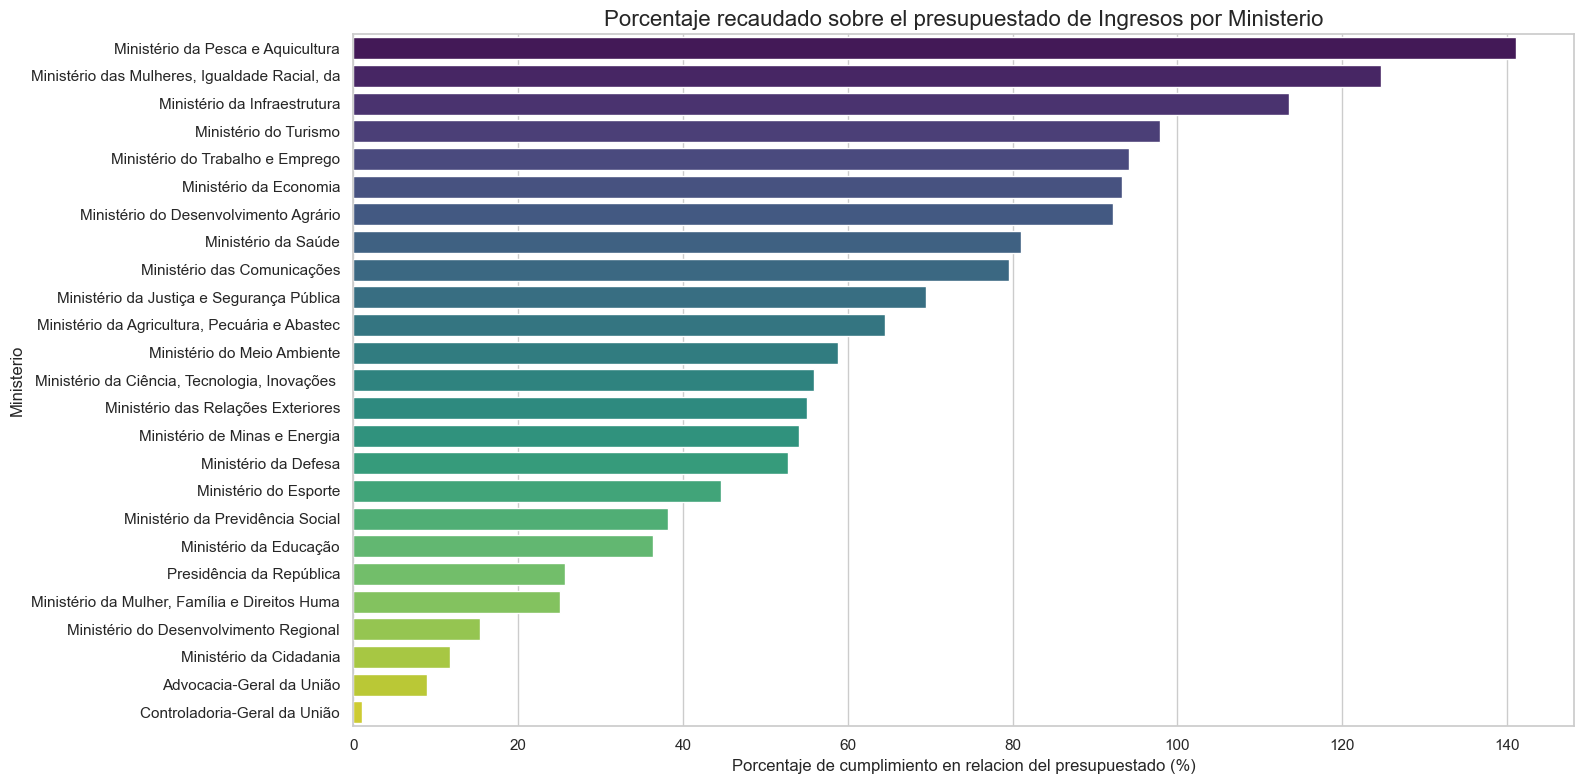

In [74]:
# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear un gráfico de barras para visualizar el porcentaje realizado por cada organismo
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df_ministerios.sort_values("porcentaje", ascending=False),
    x="porcentaje",
    y="NOM_organo_superior",
    palette="viridis"
)

# Agregar etiquetas y título
plt.xlabel("Porcentaje de cumplimiento en relacion del presupuestado (%)", fontsize=12)
plt.ylabel("Ministerio", fontsize=12)
plt.title("Porcentaje recaudado sobre el presupuestado de Ingresos por Ministerio", fontsize=16)
plt.tight_layout()

# Mostrar gráfico
plt.show()

## 02.01 Agrupacion por categoria_economica

In [78]:
df_cat_econom = df.groupby(['origen_ingreso'])[['valor_previsto_actualizado','valor_recaudado','valor_lanzado']].sum() ## Agrupamos por categoria economica
df_cat_econom["dif_prev_recaudado"] = (df_cat_econom["valor_recaudado"]-df_cat_econom["valor_previsto_actualizado"]) ## Vemos la diferencia entre el valor de recaudacion actualizado y el real.
df_cat_econom["porcentaje"] = (df_cat_econom["valor_recaudado"]/df_cat_econom["valor_previsto_actualizado"]*100) 
df_cat_econom = df_cat_econom.sort_values(["porcentaje"], ascending=[False]) ## ordenamos por porcentaje

df_cat_econom

,valor_previsto_actualizado,valor_recaudado,valor_lanzado,dif_prev_recaudado,porcentaje
origen_ingreso,,,,,
Sem informação,0.00,46.57,"2,812,347,576.39",46.57,inf
Amortizações de Empréstimos,"468,392,937,016.00","799,034,542,267.89",0.00,"330,641,605,251.89",170.59
Outras Receitas de Capital,"1,169,948,076,486.00","1,722,900,919,485.78",0.00,"552,952,842,999.78",147.26
Receita Patrimonial,"922,348,554,822.03","957,334,879,441.78","380,086,767.00","34,986,324,619.75",103.79
Receita Industrial,"20,116,477,675.00","19,256,167,707.50",0.00,"-860,309,967.50",95.72
"Impostos, Taxas e Contribuições de Melhoria","4,510,210,765,178.00","4,287,292,710,249.35","2,020,808,903,486.62","-222,918,054,928.65",95.06
Contribuições,"7,415,248,660,408.00","7,043,604,161,886.25","3,220,620,507,720.18","-371,644,498,521.75",94.99
Outras Receitas Correntes,"527,337,121,145.00","495,575,920,557.84","136,055,962,948.35","-31,761,200,587.16",93.98
Receita de Serviços,"440,758,536,057.11","410,410,034,253.08",0.00,"-30,348,501,804.03",93.11


# 02.02. Insight Generales:
### Fuentes de ingresos destacadas por cumplimiento
"Amortizações de Empréstimos" y "Outras Receitas de Capital" superan significativamente los valores previstos, con porcentajes de cumplimiento del 170.59% y 147.26%, respectivamente. Esto indica que estas fuentes recaudaron mucho más de lo esperado.

¿Que podriamos buscar?  Explorar las razones detrás de este sobrecumplimiento, como ingresos inesperados o infraestimaciones en las proyecciones.
"Receita Patrimonial" tiene un desempeño notable con un cumplimiento del 103.79%. Esto indica una buena planificación presupuestaria.

### Fuentes de ingresos con menor desempeño
"Receitas Correntes - a classificar" muestra un valor recaudado negativo (-15.47 mil millones), lo que podría ser un error contable o un ajuste significativo.
"Alienação de Bens" y "Transferências de Capital" tienen un bajo desempeño, con cumplimientos del 38.92% y 43.93%, respectivamente. Esto podría deberse a dificultades en la venta de bienes o en la recepción de transferencias de capital.

¿Que podriamos buscar? Investigar por qué "Receitas Correntes - a classificar" tiene un valor negativo y su impacto en el balance general.

### Fuentes de ingresos con cumplimiento cercano al 100%
"Receita Industrial", "Impostos, Taxas e Contribuições de Melhoria", y "Contribuições" tienen cumplimientos entre el 94% y el 96%. Esto indica proyecciones razonablemente precisas y ejecución cercana a lo planeado.
¿Que podriamos buscar? Evaluar qué factores impidieron alcanzar el 100% en estas categorías.

### Grandes brechas entre valores previstos y recaudados
"Operações de Crédito" tiene una brecha significativa, con un valor recaudado de 9.88 billones frente a un previsto de 12.79 billones, lo que representa un cumplimiento del 77.31%.
¿Que podriamos buscar? Esto puede reflejar desafíos en la obtención de créditos o una menor necesidad de financiamiento de lo estimado.

"Contribuições" también tiene una gran diferencia de -371.64 mil millones, pero con un cumplimiento alto (94.99%). Esto sugiere que aunque hay desviaciones, las recaudaciones están cerca de lo previsto.

### Outliers
"Sem informação" y "Receitas Correntes - a classificar" tienen valores aparentemente irreales, este dato podría tratarse de un error en la clasificación o una inconsistencia en los registros.
¿Que podriamos buscar?  Verificar la fuente de estos datos para determinar su validez.

### Conclusiones generales
- Algunas fuentes como "Amortizações de Empréstimos" sugieren una subestimación de ingresos o circunstancias excepcionales que impulsaron la recaudación.
- Categorías como "Alienação de Bens" necesitan un análisis detallado para entender por qué se encuentran tan por debajo de lo esperado.
- La mayoría de las fuentes están cerca del 100% de cumplimiento, lo que indica una planificación razonablemente efectiva en general.
- Los valores negativos o inconsistencias en categorías como "Sem informação" y "Receitas Correntes - a classificar" deben ser investigados para evitar impactos en futuros informes y presupuestos.


C:\Users\Agus\AppData\Local\Temp\ipykernel_19668\1670010006.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


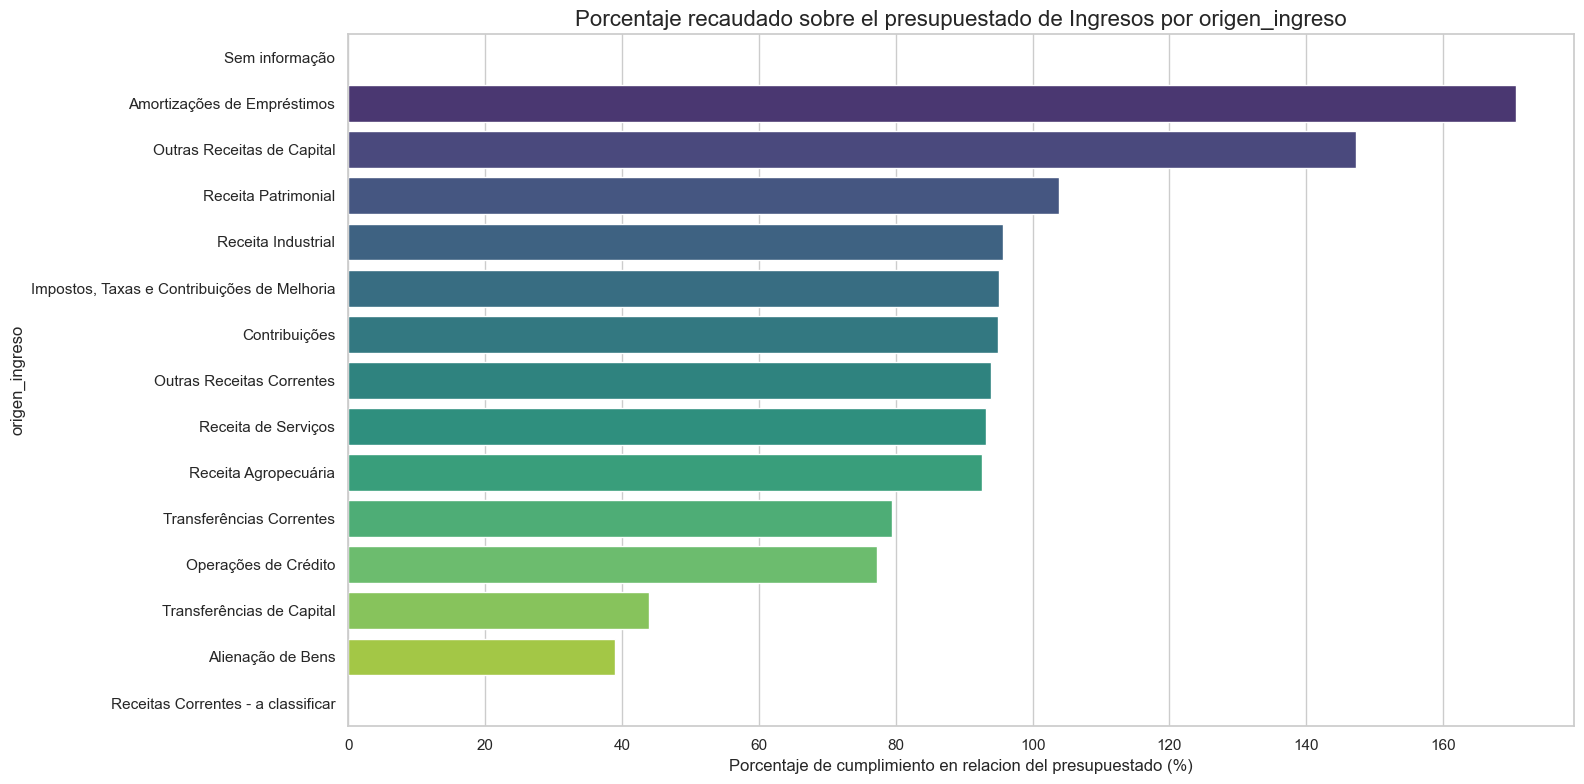

In [82]:
# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear un gráfico de barras para visualizar el porcentaje realizado por cada organismo
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df_cat_econom.sort_values("porcentaje", ascending=False),
    x="porcentaje",
    y="origen_ingreso",
    palette="viridis"
)

# Agregar etiquetas y título
plt.xlabel("Porcentaje de cumplimiento en relacion del presupuestado (%)", fontsize=12)
plt.ylabel("origen_ingreso", fontsize=12)
plt.title("Porcentaje recaudado sobre el presupuestado de Ingresos por origen_ingreso", fontsize=16)
plt.tight_layout()

# Mostrar gráfico
plt.show()